In [155]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
p1_train=pd.read_csv(r"C:\Users\mukun\Downloads\p1_train.csv")
p1_train

,A,B,C_Target
0,-7.260,9.57,5.36
1,3.460,10.70,-13.30
2,-13.000,-3.45,31.80
3,7.080,-14.10,2.00
4,-15.200,-18.60,48.80
...,...,...,...
9995,17.000,-7.38,-21.80
9996,0.258,-19.50,22.10
9997,17.600,11.30,-47.80
9998,0.532,-15.20,20.80


In [157]:
p1_test=pd.read_csv(r"C:\Users\mukun\Downloads\p1_test.csv")
p1_test

,A,B,C_Target
0,15.900,11.70,-37.6
1,-2.720,-4.54,11.5
2,-14.600,18.60,11.5
3,0.224,16.40,-15.2
4,-12.200,11.70,17.4
...,...,...,...
4995,-14.400,7.06,21.4
4996,-12.200,12.20,15.0
4997,-19.200,-18.20,56.7
4998,-13.600,2.77,26.6


In [158]:
p1_train.info()
p1_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A         10000 non-null  float64
 1   B         10000 non-null  float64
 2   C_Target  10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


A           0
B           0
C_Target    0
dtype: int64

In [9]:
p1_test.info()
p1_test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A_Test         5000 non-null   float64
 1   B_Test         5000 non-null   float64
 2   C_Test_Target  5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


A_Test           0
B_Test           0
C_Test_Target    0
dtype: int64

In [159]:
def skewplot(df,columns):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=columns)
    plt.title(f'Box plot for {columns}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=columns, kde=True, bins=50)
    plt.title(f'Distribution plot for {columns}')


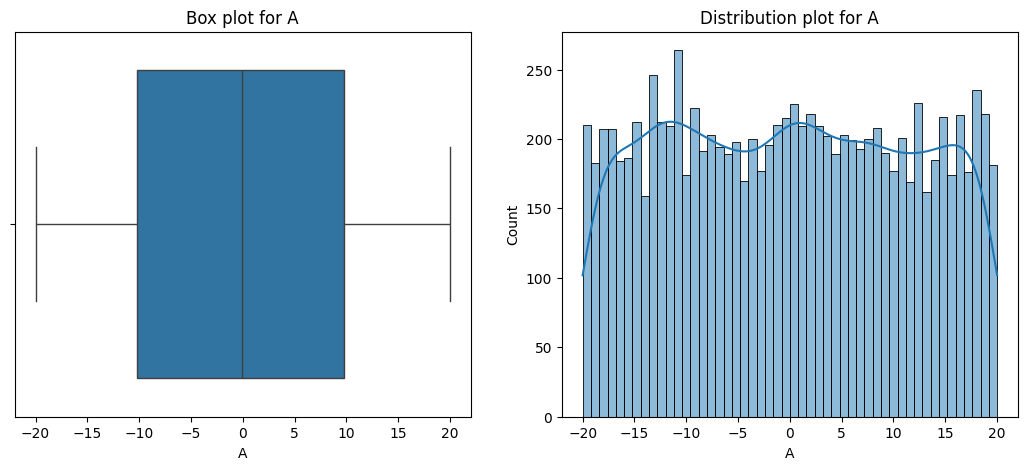

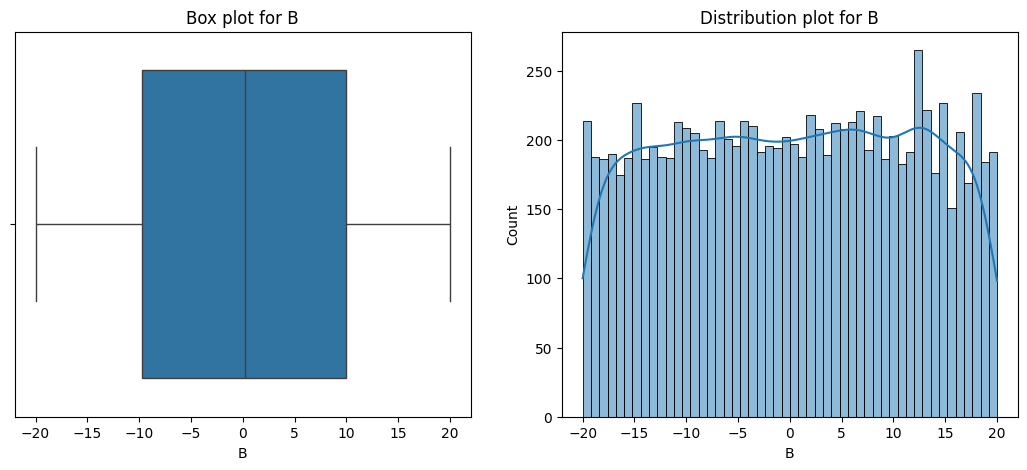

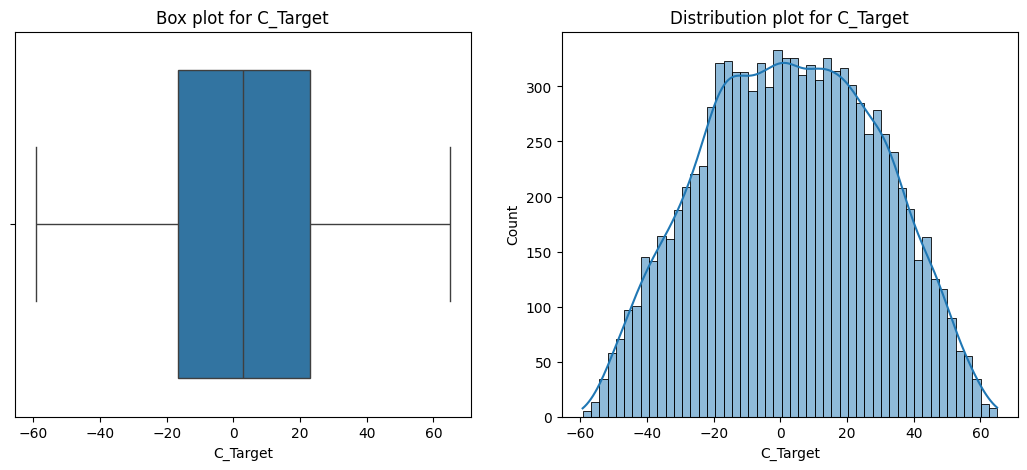

In [161]:
for i in ['A','B','C_Target']:
    skewplot(p1_train,i)

In [ ]:
#*******************************Code********************************************

In [4]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

ImportError: cannot import name 'LinearRegression' from 'sklearn.ensemble' (c:\Users\mukun\Desktop\Anu's Data Science\VS\.venv\Lib\site-packages\sklearn\ensemble\__init__.py)

In [2]:
#Finding out mean sq error and mean absolute error aand r2 score

def predicted(algorithm):

    

    x_train=p1_train.drop(columns=['C_Target'],axis=1)
    x_test=p1_test.drop(columns=['C_Target'], axis=1)
    y_train=p1_train['C_Target']
    y_test = p1_test['C_Target']

    #model = algorithm().fit(x_train, y_train)
    model = algorithm().fit(x_train, y_train)


    #y_pred_list = []
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2score=r2_score(y_test,y_pred)
    final_value=('Mean square error',mse,'Mean Absolute error',mae,'R2 Score',r2score)
    #df1=pd.DataFrame(y_pred,y_test)
    #df1.columns=['Predicted value']
    #print(final_value)

    return final_value 

In [3]:
calculation_Linear=print('Linear Regression',predicted(LinearRegression))
calculation_svr=print('SVR',predicted(SVR))

NameError: name 'LinearRegression' is not defined

In [170]:
#Finding out predicted values for c target


x_train=p1_train.drop(columns=['C_Target'],axis=1)
x_test=p1_test.drop(columns=['C_Target'], axis=1)
y_train=p1_train['C_Target']
y_test = p1_test['C_Target']

model = LinearRegression().fit(x_train, y_train)

y_pred=model.predict(x_test)

df_Predicted=pd.DataFrame(y_pred,y_test)
df_Predicted.columns=['Predicted value']
print(df_Predicted)



          Predicted value
C_Target                 
-37.6          -40.484538
 11.5           12.945457
 11.5           13.624024
-15.2          -13.825022
 17.4           15.706183
...                   ...
 21.4           24.732926
 15.0           15.207533
 56.7           59.523126
 26.6           27.411605
 11.9            9.560014

[5000 rows x 1 columns]
